In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import scipy.stats as stats
# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [519]:
import os 
os.chdir("C:\\Users\\abhin\\Desktop\\Python case study quetions\\Case Study 3 - Insurance Claims Case Study")

In [520]:
cust_df = pd.read_csv("cust_demographics.csv")
claim_df = pd.read_csv("claims.csv")

In [521]:
claim_df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [522]:
cust_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [523]:
merged_df = pd.merge(left = cust_df, right = claim_df, how = 'left', left_on= 'CUST_ID', right_on= 'customer_id' ).drop('customer_id',axis=1)

In [524]:
merged_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [525]:
merged_df.rename(columns = {'CUST_ID': 'Customer_ID'},inplace= True)

In [526]:
merged_df.head()

,Customer_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


### 2.Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance

In [528]:
merged_df.dtypes

Customer_ID              int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [529]:
merged_df.DateOfBirth = pd.to_datetime(merged_df.DateOfBirth, format = '%d-%b-%y')

In [530]:
#  merged_df.DateOfBirth= merged_df.DateOfBirth.dt.strftime('%d-%b-%Y')

In [531]:
merged_df.claim_date = pd.to_datetime(merged_df.claim_date, format = '%m/%d/%Y')

In [532]:
# merged_df.claim_date= merged_df.claim_date.dt.strftime('%d-%b-%Y')

In [533]:
merged_df.head(2)

,Customer_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No


In [534]:
merged_df.dtypes

Customer_ID                     int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                      float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
dtype: object

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [536]:
merged_df['claim_amount'] = merged_df['claim_amount'].str.replace('$','')

In [537]:
merged_df['claim_amount']= merged_df['claim_amount'].astype(float)

In [538]:
merged_df.dtypes

Customer_ID                     int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                      float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
dtype: object

In [539]:
merged_df.claim_amount.head(2)

0    2980.0
1    2980.0
Name: claim_amount, dtype: float64

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [541]:
merged_df

,Customer_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No
1088,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No
1089,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No
1090,11256802,Female,2064-10-22,LA,469-345-5617,Silver,12376894.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No


In [542]:
merged_df.claim_type.unique()

array(['Material only', 'Injury only', 'Material and injury', nan],
      dtype=object)

In [543]:
merged_df['alert_flag']= np.where((merged_df['claim_type'].isin(['Injury only', 'Material and injury'])) & (merged_df['police_report'].isin(['No', 'Unknown', np.nan])),1,0)

In [544]:
merged_df

,Customer_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,0
1088,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0
1089,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,0
1090,11256802,Female,2064-10-22,LA,469-345-5617,Silver,12376894.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0


### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique.Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [546]:
df_sorted = merged_df.sort_values(by='claim_date', ascending=False)

df_cleaned = df_sorted.drop_duplicates(subset='Customer_ID',keep='first')

df_cleaned.reset_index(drop=True, inplace=True)

df_cleaned



,Customer_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,93915431,Male,2067-09-08,ME,134-785-1687,Gold,99775483.0,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,1
1,38011078,Female,1976-05-20,NE,271-123-1475,Gold,98795403.0,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,0
2,58451506,Male,2068-04-22,FL,673-574-7823,Gold,43042986.0,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,0
3,46710738,Male,1977-04-28,MO,962-834-9361,Gold,74761374.0,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,0
4,77510822,Female,1986-03-18,AK,436-934-7156,Silver,87329176.0,Other driver error,2018-10-30,Auto,Unknown,Material only,NaN,2.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,74888099,Male,1980-07-22,CO,125-613-7698,Platinum,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0
1081,36009093,Female,1984-06-04,SC,264-374-5794,Platinum,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0
1082,60016590,Female,1984-05-25,NV,649-742-8132,Silver,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0
1083,96861647,Female,1996-08-06,NH,495-732-2638,Silver,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0


## 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [548]:
df_cleaned.isnull().sum()

Customer_ID             0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
alert_flag              0
dtype: int64

In [ ]:
for column in df_cleaned.columns:
    
    if df_cleaned[column].dtype in ['float64', 'int64']:
        df_cleaned[column].fillna(df_cleaned[column].mean(), inplace=True)
        
    elif df_cleaned[column].dtype == 'object':
        
        df_cleaned[column].fillna(df_cleaned[column].mode()[0], inplace=True)

In [550]:
df_cleaned.isnull().sum()


Customer_ID            0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
incident_cause         0
claim_date             7
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
alert_flag             0
dtype: int64

In [551]:
df_cleaned.dropna(inplace=True)

C:\Users\abhin\AppData\Local\Temp\ipykernel_7824\2343921619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace=True)


In [552]:
df_cleaned.isnull().sum()

Customer_ID            0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
alert_flag             0
dtype: int64

### 7.. Calculate the age of customers in years. Based on the age, categorize thecustomers according to the below criteria

### Children < 18, Youth 18- 30, Adult 30 -60, Senior > 60


In [554]:
# correcting incorrecting future dates in DoB column. i.e Dates > today
df_cleaned.loc[df_cleaned['DateOfBirth'].dt.year > 2025, 'DateOfBirth'] = df_cleaned['DateOfBirth'] - pd.DateOffset(years=100)

In [ ]:
today = pd.to_datetime('today')
df_cleaned['Age'] = (today - df_cleaned['DateOfBirth']).dt.days // 365

In [ ]:
df_cleaned['Age_Category'] = np.where (df_cleaned['Age'] < 18, 'Children', np.where (df_cleaned['Age'] <=30,'Youth', 
 np.where (df_cleaned['Age'] <= 60,'Adult', 'Senior')) )

In [557]:
df_cleaned[['Age','Age_Category']]

,Age,Age_Category
0,57,Adult
1,49,Adult
2,57,Adult
3,48,Adult
4,39,Adult
...,...,...
1073,25,Youth
1074,31,Adult
1075,51,Adult
1076,39,Adult


### 8. What is the average amount claimed by the customers from various segments?

In [559]:
df_cleaned[['Segment','claim_amount']].groupby(by='Segment').mean().rename(columns = 
 {'claim_amount': 'Average_Claim_Amount'}).sort_values(by = 'Average_Claim_Amount')

,Average_Claim_Amount
Segment,
Silver,12267.859374
Platinum,12371.654843
Gold,12846.400227


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [561]:
cutoff_date = pd.to_datetime('2018-10-01') - pd.Timedelta(days=20)

In [562]:
filtered_df = df_cleaned[df_cleaned['claim_date'] <= cutoff_date ]

In [563]:
filtered_df[['claim_amount','incident_cause']].groupby(by =['incident_cause']).sum().rename(columns=
 {'claim_amount':'Total_Claim_Amount'}).sort_values(by='Total_Claim_Amount')

,Total_Claim_Amount
incident_cause,
Crime,7.219386e+05
Natural causes,1.312987e+06
Other driver error,3.277536e+06
Driver error,3.315851e+06
Other causes,3.723152e+06


In [564]:
df_cleaned.head()

,Customer_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Age,Age_Category
0,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483.0,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,1,57,Adult
1,38011078,Female,1976-05-20,NE,271-123-1475,Gold,98795403.0,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,0,49,Adult
2,58451506,Male,1968-04-22,FL,673-574-7823,Gold,43042986.0,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,0,57,Adult
3,46710738,Male,1977-04-28,MO,962-834-9361,Gold,74761374.0,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,0,48,Adult
4,77510822,Female,1986-03-18,AK,436-934-7156,Silver,87329176.0,Other driver error,2018-10-30,Auto,Unknown,Material only,12501.726555,2.0,No,0,39,Adult


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [566]:
df_filtered = df_cleaned[(df_cleaned['Age'] >= 18) &
    (df_cleaned['State'].isin(['TX', 'DE', 'AK'])) &
    (df_cleaned['incident_cause'].isin(['Driver error', 'Other driver error']))]

In [567]:
print("Number of adult driver-related claims from TX, DE, and AK:",df_filtered.shape[0])

Number of adult driver-related claims from TX, DE, and AK: 35


### 11.Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [569]:
grouped = df_cleaned[['claim_amount','gender','Segment']].groupby(by =['gender','Segment'] ).sum().reset_index()
grouped['Label'] = grouped['gender'] + ' - ' + grouped['Segment']

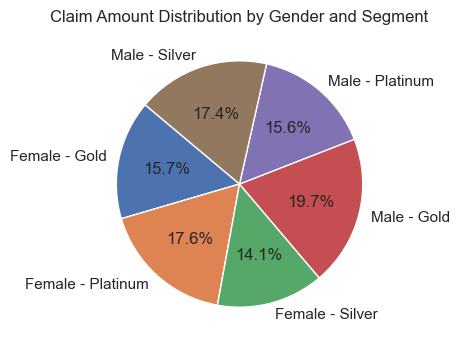

In [570]:
plt.figure(figsize=(4,4))
plt.pie(grouped['claim_amount'],
        labels=grouped['Label'],
        autopct='%1.1f%%',
        startangle=140,
        )

plt.title('Claim Amount Distribution by Gender and Segment')

plt.show()

### 12.  Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [572]:
driver_issues = df_cleaned[df_cleaned['incident_cause'].isin(['Driver error', 'Other driver error'])]

In [573]:
gender_claims = driver_issues[['gender','claim_amount']].groupby(by = 'gender').sum().sort_values(by
                                                    = 'claim_amount',ascending=False).reset_index()

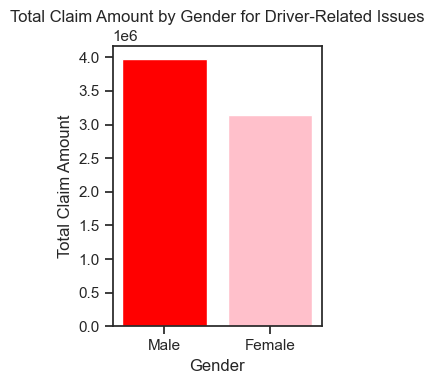

In [574]:
plt.figure(figsize=(3, 4))
plt.bar(gender_claims['gender'], gender_claims['claim_amount'], color=['red', 'pink'])
plt.title('Total Claim Amount by Gender for Driver-Related Issues')
plt.xlabel('Gender')
plt.ylabel('Total Claim Amount')
plt.tight_layout()
plt.show()

### 13 Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart

In [576]:
fraud = df_cleaned[df_cleaned['fraudulent']== 'Yes']
fraud_counts = fraud['Age_Category'].value_counts().sort_values(ascending = False)

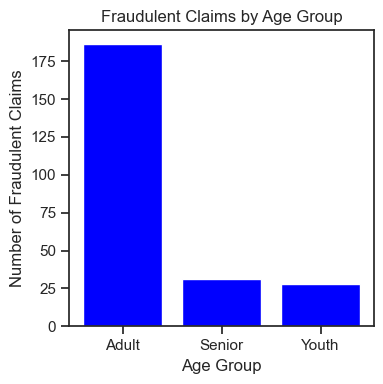

In [577]:
plt.figure(figsize=(4, 4))
plt.bar(fraud_counts.index.astype(str), fraud_counts.values, color='blue')
plt.title('Fraudulent Claims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Fraudulent Claims')
plt.tight_layout()
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in chronological order not alphabetical order.

In [ ]:
# Extract Year-Month as string
df_cleaned['Month'] = df_cleaned['claim_date'].dt.to_period('M').astype(str)

# Group by Year-Month and sum claim amount
monthly_trend = df_cleaned[['Month','claim_amount']].groupby(by = 'Month').sum().sort_values(by = 'Month').reset_index()

# Convert Month string back to datetime for sorting & formatting
monthly_trend['Month'] = pd.to_datetime(monthly_trend['Month'])


# Extract month name with year for bar labels
monthly_trend['Month_Label'] = monthly_trend['Month'].dt.strftime('%b %Y')


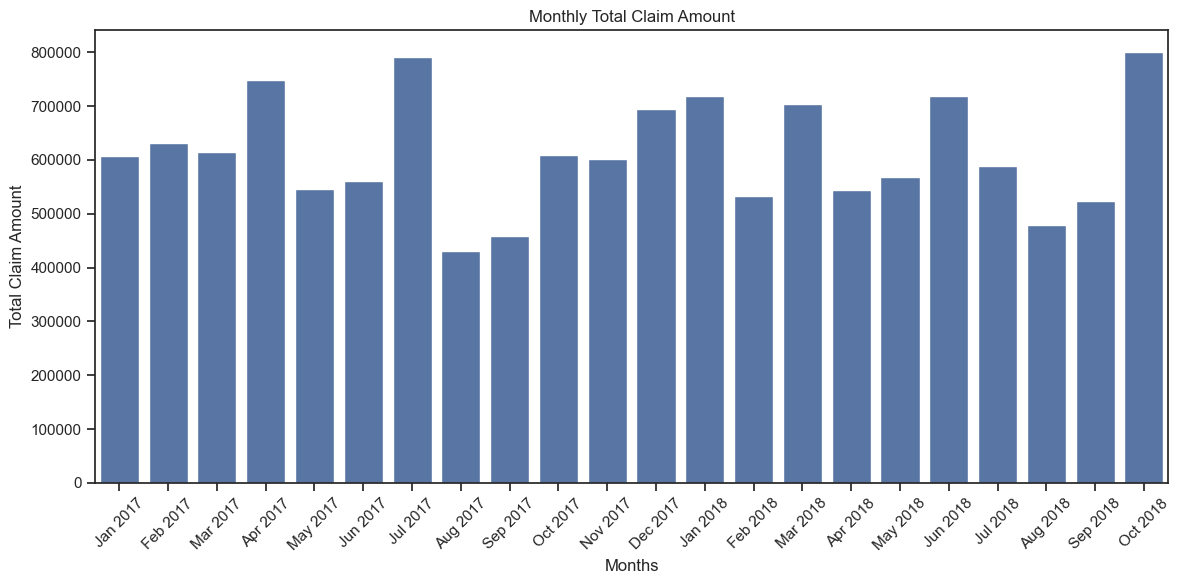

In [580]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_trend, x='Month_Label', y='claim_amount')

plt.title('Monthly Total Claim Amount')
plt.xlabel('Months')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims

In [666]:
grouped = df_cleaned[['gender','Age_Category','fraudulent','claim_amount']].groupby(by=['gender','fraudulent','Age_Category']).mean().rename(columns=
                                                        {'claim_amount':'Average Claim Amount'}).reset_index()

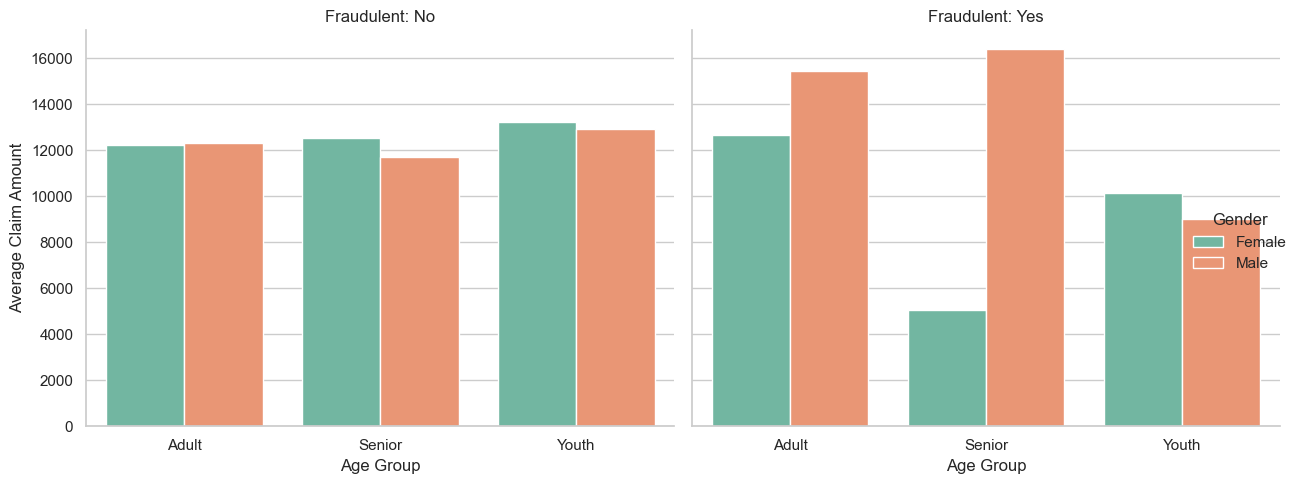

In [583]:
sns.set(style="whitegrid")
g = sns.catplot(
    data=grouped,
    kind="bar",
    x="Age_Category",
    y="Average Claim Amount",
    hue="gender",
    col="fraudulent",  # One facet for 'Yes', one for 'No'
    palette="Set2",
    height=5,
    aspect=1.2
)

g.set_axis_labels("Age Group", "Average Claim Amount")
g.set_titles("Fraudulent: {col_name}")
g._legend.set_title("Gender")
plt.tight_layout()
plt.show()



## Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

### 16. Is there any similarity in the amount claimed by males and females?

In [586]:
# Separate the claim amounts by gender
male_claims = df_cleaned[df_cleaned['gender'] == 'Male']['claim_amount'].dropna()
female_claims = df_cleaned[df_cleaned['gender'] == 'Female']['claim_amount'].dropna()

In [587]:
# # Perform the t-test
t_stat, p_value = stats.ttest_ind(male_claims, female_claims, equal_var=False)  # Welch’s t-test
print('T-statistic:', t_stat, 'P-value:', p_value)

T-statistic: 0.9631807435884877 P-value: 0.3356732711202426


### 17. Is there any relationship between age category and segment?

In [589]:
contingency_table = pd.crosstab(df_cleaned['Age_Category'], df_cleaned['Segment'])


In [590]:
s1 = stats.chi2_contingency (contingency_table)
print("P-Value:", (p_value))

P-Value: 0.3356732711202426


### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [592]:
current_year_claims = df_cleaned[df_cleaned['claim_date'].dt.year == 2018]['claim_amount']

In [593]:
# One-sample one-sided t-test
t_stat, p_val = stats.ttest_1samp(current_year_claims, 10000)

# One-tailed test adjustment
p_val = p_val / 2 if t_stat > 0 else 1 - (p_val / 2)

print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 4.477343563243787, P-value: 4.717922110991665e-06


### 19. Is there any difference between age groups and insurance claims?

In [595]:
# Group claim amounts by age category
youth = df_filtered[df_filtered['Age_Category'] == 'Youth']['claim_amount']
adult = df_filtered[df_filtered['Age_Category'] == 'Adult']['claim_amount']
senior = df_filtered[df_filtered['Age_Category'] == 'Senior']['claim_amount']

In [596]:
# Perform One-Way ANOVA
f_stat, p_val = stats.f_oneway( youth, adult, senior)

print(f"F-statistic: {f_stat:.4f}, P-value: {p_val:.4f}")

F-statistic: 0.1855, P-value: 0.8316


### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [598]:
# filtering and grouping the data.
df_corr = df_cleaned[['total_policy_claims', 'claim_amount']]

In [599]:
corr, p_value = stats.pearsonr(df_corr['total_policy_claims'], df_corr['claim_amount'])

print(f'Pearson correlation coefficient: {corr:.4f}')
print(f'P-value: {p_value:.4f}')

Pearson correlation coefficient: -0.0219
P-value: 0.4724


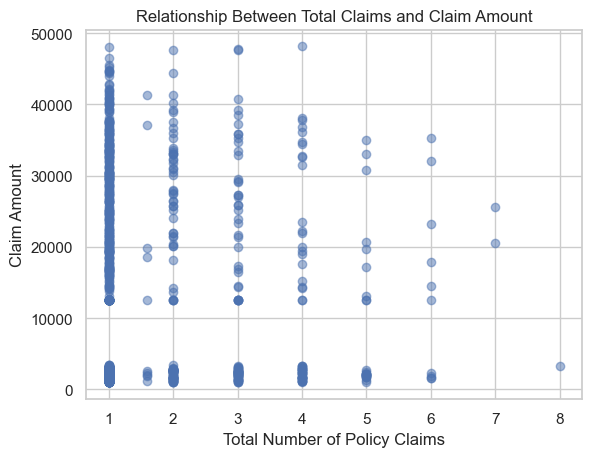

In [600]:
plt.scatter(df_corr['total_policy_claims'], df_corr['claim_amount'], alpha=0.5)
plt.xlabel('Total Number of Policy Claims')
plt.ylabel('Claim Amount')
plt.title('Relationship Between Total Claims and Claim Amount')
plt.show()